#Affine/Softmax

In [1]:
import numpy as np

In [2]:
X = np.array([1,2])
W = np.array([[1,2,3],[4,5,6]])
B = np.array([1,2,3])

print(X)
print("-" * 50)
print(W)
print("-" * 50)
print(B)
print("-" * 50)
print(np.dot(X, W))

Y = np.dot(X, W) + B
print("-" * 50)
print(Y)

[1 2]
--------------------------------------------------
[[1 2 3]
 [4 5 6]]
--------------------------------------------------
[1 2 3]
--------------------------------------------------
[ 9 12 15]
--------------------------------------------------
[10 14 18]


## affine

In [3]:
class affine():
  def __init__(self, W, B):
    self.W = W
    self.B = B
    self.X = None
    self.dW = None
    self.dB = None

  def forward(self, X):
    self.X = X
    out = np.dot(X, self.W) + self.B
    return out

  def backword(self, dout):
    # 전치 행렬
    dx = np.dot(dout, self.W.T)
    self.dW = np.dot(self.X.T, dout)
    self.dB = np.sum(dout, axis=0)

    return dx

## **softmaxWithLosss**

In [4]:
def cross_entropy_error(y,t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size

def softmax(a):
  c = np.max(a)               # 최대값을 구해서 수치 안정성을 위해 빼줌
  exp_a = np.exp(a - c)       # 입력 값을 조정 후 지수 계산
  sum_exp_a = np.sum(exp_a)   # 지수 값들의 합
  y = exp_a / sum_exp_a       # 정규화 (각 값을 합으로 나눔)
  return y

class SoftmaxWithLoss():
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None

  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = cross_entropy_error(self.y, self.t)
    return self.loss

  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    dx = (self.y - self.t) / batch_size
    return dx

ㅈㄹㅂㄴㅁㄱㄹㅁ

In [5]:
!git clone https://github.com/oreilly-japan/deep-learning-from-scratch

Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 573, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 573 (delta 3), reused 0 (delta 0), pack-reused 562 (from 4)
Receiving objects: 100% (573/573), 10.61 MiB | 10.58 MiB/s, done.
Resolving deltas: 100% (290/290), done.


In [6]:
import sys, os
sys.path.append(os.pardir)
sys.path.append(
    os.path.join(os.getcwd(), 'deep-learning-from-scratch')
)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)
        self.layers = OrderedDict
        self.layers['Relu1'] = Relu()
        self.layers['Affine1'] = Affine(self.params['W1'], self.params['b1'])
        self.lastLayer = SoftmaxWithLoss()
    def predict(self,x):
        for layer in self.layers.values():
          x = layer.forward(x)
        return x
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1:
          t = np.argmax(t, axis=1)
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        return grads

    def gradient(self, x, t):
        self.loss(x, t)
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].dB
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].dB
        return grads




In [7]:
import numpy as np
from dataset.mnist import load_mnist
from ch05.two_layer_net import TwoLayerNet

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

Done
Done
Done
Done
Converting train-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting train-labels-idx1-ubyte.gz to NumPy Array ...
Done
Converting t10k-images-idx3-ubyte.gz to NumPy Array ...
Done
Converting t10k-labels-idx1-ubyte.gz to NumPy Array ...
Done
Creating pickle file ...
Done!
W1:4.249963709652623e-10
b1:2.5436931642625125e-09
W2:6.556359419866288e-09
b2:1.400805129350702e-07


In [8]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

epoch = 1
iters_num = epoch * len(x_train)
train_size = x_train.shape[0]
batch_size = 1000
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)

    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))


train acc, test acc | 0.15731666666666666, 0.1698
train acc, test acc | 0.5381333333333334, 0.5428
train acc, test acc | 0.7829, 0.7906
train acc, test acc | 0.8408, 0.8457
train acc, test acc | 0.8681, 0.874
train acc, test acc | 0.8816666666666667, 0.8862
train acc, test acc | 0.88975, 0.8938
train acc, test acc | 0.8961333333333333, 0.8988
train acc, test acc | 0.9004166666666666, 0.9033
train acc, test acc | 0.9043666666666667, 0.907
train acc, test acc | 0.9069666666666667, 0.9096
train acc, test acc | 0.9096666666666666, 0.9108
train acc, test acc | 0.9122833333333333, 0.9153
train acc, test acc | 0.9140833333333334, 0.9166
train acc, test acc | 0.9167666666666666, 0.9188
train acc, test acc | 0.9187333333333333, 0.9191
train acc, test acc | 0.9207833333333333, 0.9227
train acc, test acc | 0.92225, 0.9221
train acc, test acc | 0.9238, 0.9244
train acc, test acc | 0.9254666666666667, 0.9259
train acc, test acc | 0.92625, 0.9265
train acc, test acc | 0.9275833333333333, 0.9285
trai

In [9]:
predictions = softmax(network.predict(x_train[48].reshape(1, -1)))[0] * 100
for i, pred in enumerate(predictions):
    print(f"클래스 {i}: {pred:.2f}%")

클래스 0: 0.00%
클래스 1: 1.97%
클래스 2: 0.00%
클래스 3: 12.59%
클래스 4: 0.00%
클래스 5: 1.20%
클래스 6: 0.00%
클래스 7: 0.00%
클래스 8: 1.08%
클래스 9: 83.16%


In [10]:
#print(softmax(network.predict(x_train[0].reshape(1, -1) )))

for i in range(len(x_train)):
  predictions = softmax(network.predict(x_train[i].reshape(1, -1)))
  if np.argmax(t_train[i]) != np.argmax(predictions):
    print(i , "정답 :", np.argmax(t_train[i]), "예측 :", np.argmax(predictions))
    print('[',end='')
    for i, pred in enumerate(predictions[0]):
      print(f"{pred*100:.2f}%, ",end='')
    print(']')
    input('')

4476 정답 : 2 예측 : 1
[0.00%, 86.14%, 7.96%, 2.63%, 0.00%, 2.72%, 0.00%, 0.00%, 0.56%, 0.00%, ]


KeyboardInterrupt: Interrupted by user

SGD - 선택적 경사 하강법


In [11]:
class SGD:
  def __init__(self,lr=0.01):
    self.lr = lr

  def update(self, params, grads):
    for key in params.keys():
      params[key] -= self.lr * grads[key]

In [12]:
from util.
network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)
optimizer = SGD(lr=0.1)

for i in range(10000):
  x_batch, t_batch = get_mini_batch(batch_size)
  grads = network.gradient(x_batch, t_batch)
  optimizer.update(network.params, grads)

SyntaxError: invalid syntax (<ipython-input-12-4ebb00c650c6>, line 1)

===========iteration:0===========
SGD:2.2921290496316944
Momentum:2.4277643062674454
AdaGrad:2.3360547596973453
Adam:2.1501293623760507
===========iteration:100===========
SGD:1.5311857835304223
Momentum:0.4896421284008139
AdaGrad:0.18975098013114472
Adam:0.34767778606752275
===========iteration:200===========
SGD:0.7437849760601793
Momentum:0.20575103139675224
AdaGrad:0.08424977196367057
Adam:0.16638270232979324
===========iteration:300===========
SGD:0.5263315138832028
Momentum:0.24083463374875244
AdaGrad:0.07734803189827616
Adam:0.18363502153388664
===========iteration:400===========
SGD:0.5231605980715287
Momentum:0.24476433628969044
AdaGrad:0.10451791470157722
Adam:0.13523299155485224
===========iteration:500===========
SGD:0.4227157298498784
Momentum:0.1809732362091822
AdaGrad:0.07212241076720774
Adam:0.1206839177043711
===========iteration:600===========
SGD:0.3856152346091032
Momentum:0.1749052585665495
AdaGrad:0.08586675159079266
Adam:0.1565626987041912
===========iteration:70

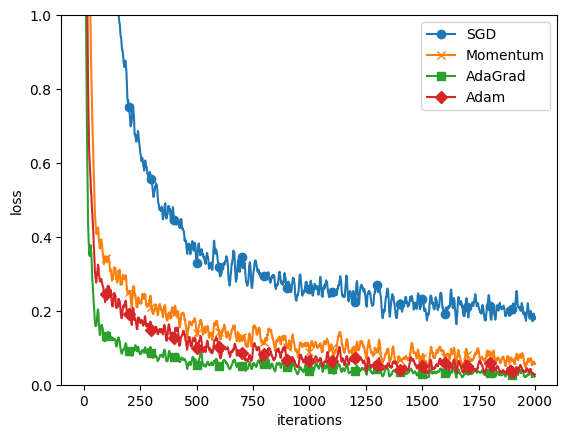

In [13]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
optimizers = {}
optimizers['SGD'] = SGD()
optimizers['Momentum'] = Momentum()
optimizers['AdaGrad'] = AdaGrad()
optimizers['Adam'] = Adam()
#optimizers['RMSprop'] = RMSprop()

networks = {}
train_loss = {}
for key in optimizers.keys():
    networks[key] = MultiLayerNet(
        input_size=784, hidden_size_list=[100, 100, 100, 100],
        output_size=10)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print( "===========" + "iteration:" + str(i) + "===========")
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in optimizers.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 1)
plt.legend()
plt.show()


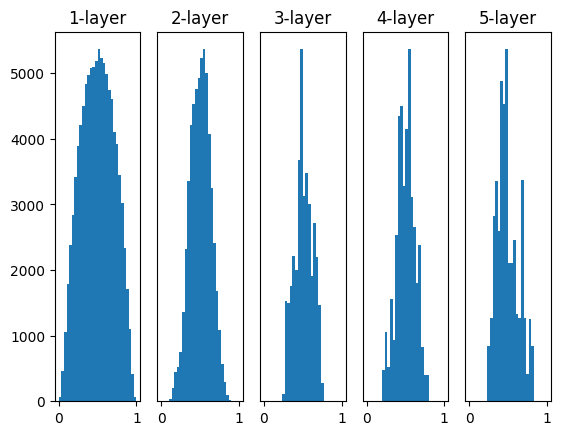

In [14]:
# coding: utf-8
import numpy as np
import matplotlib.pyplot as plt


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def ReLU(x):
    return np.maximum(0, x)


def tanh(x):
    return np.tanh(x)

input_data = np.random.randn(1000, 100)  # 1000個のデータ
node_num = 100  # 各隠れ層のノード（ニューロン）の数
hidden_layer_size = 5  # 隠れ層が5層
activations = {}  # ここにアクティベーションの結果を格納する

x = input_data

for i in range(hidden_layer_size):
    if i != 0:
        x = activations[i-1]

    # 初期値の値をいろいろ変えて実験しよう！
    w = np.random.randn(node_num, node_num) * 1
    # w = np.random.randn(node_num, node_num) * 0.01
    w = np.random.randn(node_num, node_num) * np.sqrt(1.0 / node_num)
    # w = np.random.randn(node_num, node_num) * np.sqrt(2.0 / node_num)


    a = np.dot(x, w)


    # 活性化関数の種類も変えて実験しよう！
    z = sigmoid(a)
    # z = ReLU(a)
    # z = tanh(a)

    activations[i] = z

# ヒストグラムを描画
for i, a in activations.items():
    plt.subplot(1, len(activations), i+1)
    plt.title(str(i+1) + "-layer")
    if i != 0: plt.yticks([], [])
    # plt.xlim(0.1, 1)
    # plt.ylim(0, 7000)
    plt.hist(a.flatten(), 30, range=(0,1))
plt.show()


===========iteration:0===========
std=0.01:2.3025669616552107
Xavier:2.30726668160212
He:2.4557186921492424
===========iteration:100===========
std=0.01:2.30178331500166
Xavier:2.219195875980053
He:1.7137307042715124
===========iteration:200===========
std=0.01:2.300221722167625
Xavier:2.04922867640943
He:0.8340275327622441
===========iteration:300===========
std=0.01:2.299899146632564
Xavier:1.7142629106604041
He:0.6818006609892794
===========iteration:400===========
std=0.01:2.3006653695089048
Xavier:1.0779587310450776
He:0.4951970811595087
===========iteration:500===========
std=0.01:2.300390451502737
Xavier:0.7330872092816698
He:0.2787468084880472
===========iteration:600===========
std=0.01:2.2988838328049166
Xavier:0.5392427720573783
He:0.26820706268391825
===========iteration:700===========
std=0.01:2.302501503618265
Xavier:0.5655431029644483
He:0.3716553208367154
===========iteration:800===========
std=0.01:2.3046843855444554
Xavier:0.6064926257352807
He:0.4543158703369705
====

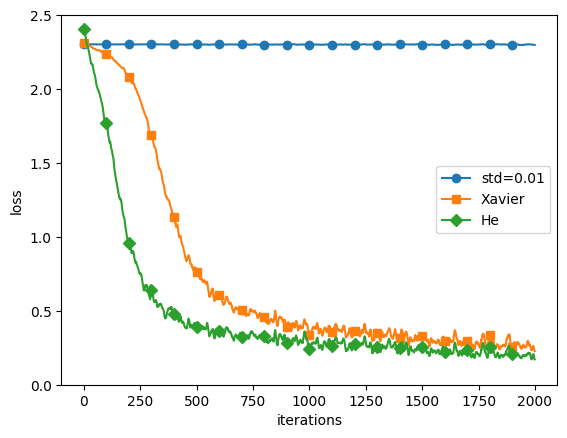

In [15]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD


# 0:MNISTデータの読み込み==========
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


# 1:実験の設定==========
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []


# 2:訓練の開始==========
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))


# 3.グラフの描画==========
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()

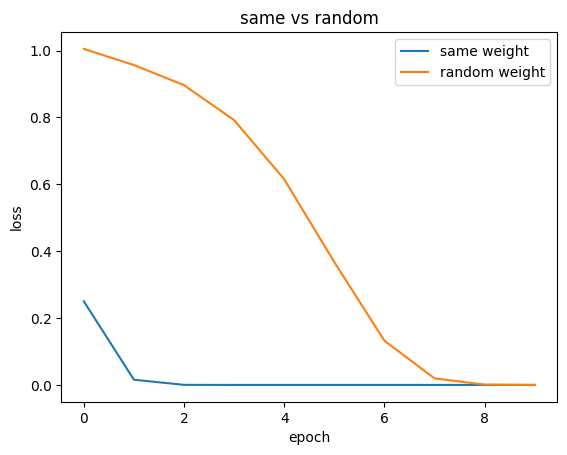

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# 학습 데이터를 생성합니다.
X = np.array([[1, 2]])        # 입력 데이터
y = np.array([[1]])           # 목표값

# 학습률과 에포크 수를 설정합니다.
learning_rate = 0.1
epochs = 10

# 1. 가중치를 동일한 값으로 초기화한 경우
def train_same_weights():
    # 가중치를 모두 0.5로 초기화합니다.
    W1 = np.full((2, 2), 0.5)  # 은닉층 가중치 (2x2 행렬)
    W2 = np.full((2, 1), 0.5)  # 출력층 가중치 (2x1 벡터)

    loss_list = []

    for epoch in range(epochs):
        # 순전파
        hidden = X.dot(W1)
        output = hidden.dot(W2)

        # 손실 계산 (MSE Loss)
        loss = np.mean((output - y) ** 2)
        loss_list.append(loss)

        # 역전파
        dL_doutput = 2 * (output - y)  # MSE 손실의 gradient
        dL_dW2 = hidden.T.dot(dL_doutput)
        dL_dhidden = dL_doutput.dot(W2.T)
        dL_dW1 = X.T.dot(dL_dhidden)

        # 가중치 업데이트
        W1 -= learning_rate * dL_dW1
        W2 -= learning_rate * dL_dW2

    return loss_list

# 2. 가중치를 무작위 값으로 초기화한 경우
def train_random_weights():
    # 가중치를 무작위로 초기화합니다.
    W1 = np.random.randn(2, 2) * 0.1  # 은닉층 가중치 (표준 정규분포에서 표준편차 0.1로 초기화)
    W2 = np.random.randn(2, 1) * 0.1  # 출력층 가중치

    loss_list = []

    for epoch in range(epochs):
        # 순전파
        hidden = X.dot(W1)
        output = hidden.dot(W2)

        # 손실 계산 (MSE Loss)
        loss = np.mean((output - y) ** 2)
        loss_list.append(loss)

        # 역전파
        dL_doutput = 2 * (output - y)
        dL_dW2 = hidden.T.dot(dL_doutput)
        dL_dhidden = dL_doutput.dot(W2.T)
        dL_dW1 = X.T.dot(dL_dhidden)

        # 가중치 업데이트
        W1 -= learning_rate * dL_dW1
        W2 -= learning_rate * dL_dW2

    return loss_list

# 학습을 실행하고 결과를 비교합니다.
loss_same = train_same_weights()
loss_random = train_random_weights()

# 손실 그래프를 그립니다.
plt.plot(range(epochs), loss_same, label='same weight')
plt.plot(range(epochs), loss_random, label='random weight')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('same vs random')
plt.legend()
plt.show()

============== 1/16 ==============
epoch:0 | 0.094 - 0.078
epoch:1 | 0.099 - 0.062
epoch:2 | 0.099 - 0.087
epoch:3 | 0.099 - 0.112
epoch:4 | 0.099 - 0.135
epoch:5 | 0.116 - 0.15
epoch:6 | 0.117 - 0.17
epoch:7 | 0.116 - 0.192
epoch:8 | 0.116 - 0.208
epoch:9 | 0.116 - 0.231
epoch:10 | 0.117 - 0.239
epoch:11 | 0.117 - 0.26
epoch:12 | 0.117 - 0.272
epoch:13 | 0.117 - 0.283
epoch:14 | 0.117 - 0.29
epoch:15 | 0.117 - 0.309
epoch:16 | 0.117 - 0.318
epoch:17 | 0.117 - 0.333
epoch:18 | 0.117 - 0.352
epoch:19 | 0.117 - 0.366
============== 2/16 ==============
epoch:0 | 0.097 - 0.088


<ipython-input-17-e026d1e25eee>:85: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc='lower right')
/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: overflow encountered in square
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/deep-learning-from-scratch/common/multi_layer_net_extend.py:101: RuntimeWarning: invalid value encountered in scalar multiply
  weight_decay += 0.5 * self.weight_decay_lambda * np.sum(W**2)
/content/deep-learning-from-scratch/common/functions.py:32: RuntimeWarning: invalid value encountered in subtract
  x = x - np.max(x, axis=-1, keepdims=True)   # オーバーフロー対策


epoch:1 | 0.097 - 0.113
epoch:2 | 0.097 - 0.118
epoch:3 | 0.097 - 0.12
epoch:4 | 0.097 - 0.14
epoch:5 | 0.097 - 0.149
epoch:6 | 0.097 - 0.175
epoch:7 | 0.097 - 0.19
epoch:8 | 0.097 - 0.213
epoch:9 | 0.097 - 0.235
epoch:10 | 0.097 - 0.263
epoch:11 | 0.097 - 0.268
epoch:12 | 0.097 - 0.296
epoch:13 | 0.097 - 0.326
epoch:14 | 0.097 - 0.345
epoch:15 | 0.097 - 0.362
epoch:16 | 0.097 - 0.377
epoch:17 | 0.097 - 0.395
epoch:18 | 0.097 - 0.423
epoch:19 | 0.097 - 0.429
============== 3/16 ==============
epoch:0 | 0.136 - 0.101
epoch:1 | 0.405 - 0.112
epoch:2 | 0.549 - 0.12
epoch:3 | 0.622 - 0.163
epoch:4 | 0.695 - 0.21
epoch:5 | 0.773 - 0.247
epoch:6 | 0.809 - 0.29
epoch:7 | 0.816 - 0.322
epoch:8 | 0.874 - 0.365
epoch:9 | 0.909 - 0.401
epoch:10 | 0.926 - 0.423
epoch:11 | 0.944 - 0.445
epoch:12 | 0.959 - 0.479
epoch:13 | 0.963 - 0.495
epoch:14 | 0.97 - 0.529
epoch:15 | 0.976 - 0.543
epoch:16 | 0.98 - 0.562
epoch:17 | 0.982 - 0.586
epoch:18 | 0.985 - 0.595
epoch:19 | 0.989 - 0.62
============== 4/1

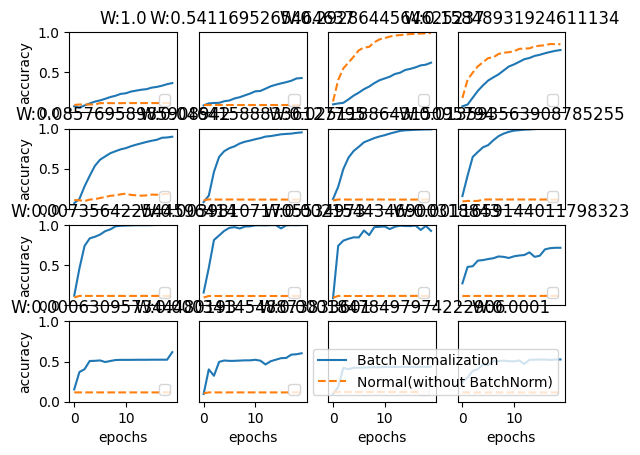

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.optimizer import SGD, Adam

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 学習データを削減
x_train = x_train[:1000]
t_train = t_train[:1000]

max_epochs = 20
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.01


def __train(weight_init_std):
    bn_network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                    weight_init_std=weight_init_std, use_batchnorm=True)
    network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100], output_size=10,
                                weight_init_std=weight_init_std)
    optimizer = SGD(lr=learning_rate)

    train_acc_list = []
    bn_train_acc_list = []

    iter_per_epoch = max(train_size / batch_size, 1)
    epoch_cnt = 0

    for i in range(1000000000):
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        for _network in (bn_network, network):
            grads = _network.gradient(x_batch, t_batch)
            optimizer.update(_network.params, grads)

        if i % iter_per_epoch == 0:
            train_acc = network.accuracy(x_train, t_train)
            bn_train_acc = bn_network.accuracy(x_train, t_train)
            train_acc_list.append(train_acc)
            bn_train_acc_list.append(bn_train_acc)

            print("epoch:" + str(epoch_cnt) + " | " + str(train_acc) + " - " + str(bn_train_acc))

            epoch_cnt += 1
            if epoch_cnt >= max_epochs:
                break

    return train_acc_list, bn_train_acc_list


# 3.グラフの描画==========
weight_scale_list = np.logspace(0, -4, num=16)
x = np.arange(max_epochs)

for i, w in enumerate(weight_scale_list):
    print( "============== " + str(i+1) + "/16" + " ==============")
    train_acc_list, bn_train_acc_list = __train(w)

    plt.subplot(4,4,i+1)
    plt.title("W:" + str(w))
    if i == 15:
        plt.plot(x, bn_train_acc_list, label='Batch Normalization', markevery=2)
        plt.plot(x, train_acc_list, linestyle = "--", label='Normal(without BatchNorm)', markevery=2)
    else:
        plt.plot(x, bn_train_acc_list, markevery=2)
        plt.plot(x, train_acc_list, linestyle="--", markevery=2)

    plt.ylim(0, 1.0)
    if i % 4:
        plt.yticks([])
    else:
        plt.ylabel("accuracy")
    if i < 12:
        plt.xticks([])
    else:
        plt.xlabel("epochs")
    plt.legend(loc='lower right')

plt.show()

오버피팅

epoch:0, train acc:0.07, test acc:0.082
epoch:1, train acc:0.09666666666666666, test acc:0.0806
epoch:2, train acc:0.13, test acc:0.096
epoch:3, train acc:0.18666666666666668, test acc:0.1121
epoch:4, train acc:0.24, test acc:0.1362
epoch:5, train acc:0.27666666666666667, test acc:0.1727
epoch:6, train acc:0.30666666666666664, test acc:0.1948
epoch:7, train acc:0.36, test acc:0.2259
epoch:8, train acc:0.36333333333333334, test acc:0.2474
epoch:9, train acc:0.3933333333333333, test acc:0.2598
epoch:10, train acc:0.45666666666666667, test acc:0.2891
epoch:11, train acc:0.4766666666666667, test acc:0.3066
epoch:12, train acc:0.48333333333333334, test acc:0.3224
epoch:13, train acc:0.5033333333333333, test acc:0.3359
epoch:14, train acc:0.5433333333333333, test acc:0.3766
epoch:15, train acc:0.5733333333333334, test acc:0.3912
epoch:16, train acc:0.5833333333333334, test acc:0.4161
epoch:17, train acc:0.63, test acc:0.4557
epoch:18, train acc:0.6266666666666667, test acc:0.4595
epoch:19, t

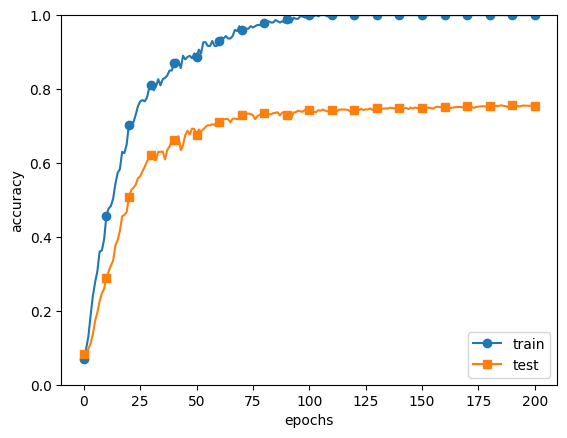

In [18]:

from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

x_train = x_train[:300]
t_train = t_train[:300]

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10)
optimizer = SGD(lr=0.01)

max_epochs = 201
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break

markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

가중치 감소

epoch:0, train acc:0.09333333333333334, test acc:0.1046
epoch:1, train acc:0.11333333333333333, test acc:0.1166
epoch:2, train acc:0.16, test acc:0.1396
epoch:3, train acc:0.16333333333333333, test acc:0.1468
epoch:4, train acc:0.19, test acc:0.1569
epoch:5, train acc:0.20333333333333334, test acc:0.1722
epoch:6, train acc:0.21666666666666667, test acc:0.1798
epoch:7, train acc:0.25666666666666665, test acc:0.1966
epoch:8, train acc:0.27666666666666667, test acc:0.2117
epoch:9, train acc:0.2866666666666667, test acc:0.2183
epoch:10, train acc:0.2866666666666667, test acc:0.2184
epoch:11, train acc:0.29, test acc:0.2287
epoch:12, train acc:0.31, test acc:0.2324
epoch:13, train acc:0.30666666666666664, test acc:0.2384
epoch:14, train acc:0.32, test acc:0.2439
epoch:15, train acc:0.3333333333333333, test acc:0.2549
epoch:16, train acc:0.32666666666666666, test acc:0.2534
epoch:17, train acc:0.32666666666666666, test acc:0.2582
epoch:18, train acc:0.33, test acc:0.2629
epoch:19, train acc:

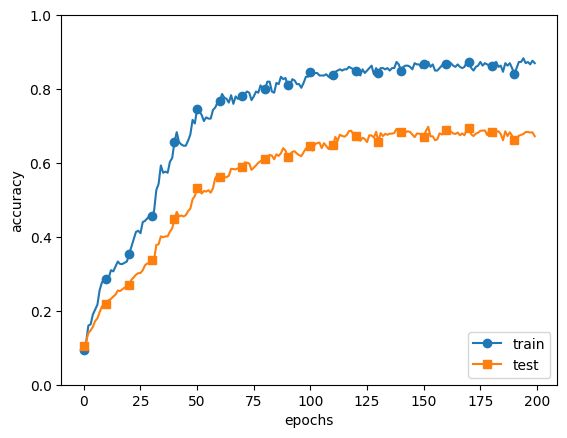

In [19]:
# coding: utf-8
import os
import sys

sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# weight decay（荷重減衰）の設定 =======================
#weight_decay_lambda = 0 # weight decayを使用しない場合
weight_decay_lambda = 0.1
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100], output_size=10,
                        weight_decay_lambda=weight_decay_lambda)
optimizer = SGD(lr=0.01)

max_epochs = 200
train_size = x_train.shape[0]
batch_size = 100

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)
epoch_cnt = 0

for i in range(1000000000):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grads = network.gradient(x_batch, t_batch)
    optimizer.update(network.params, grads)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)

        print("epoch:" + str(epoch_cnt) + ", train acc:" + str(train_acc) + ", test acc:" + str(test_acc))

        epoch_cnt += 1
        if epoch_cnt >= max_epochs:
            break


# 3.グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(max_epochs)
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

드롭아웃

train loss:2.296894850088393
=== epoch:1, train acc:0.11333333333333333, test acc:0.0968 ===
train loss:2.3249316183035993
train loss:2.298074445489142
train loss:2.3178470281891475
=== epoch:2, train acc:0.11333333333333333, test acc:0.0969 ===
train loss:2.3359950945462424
train loss:2.3071630334376674
train loss:2.3266159296548206
=== epoch:3, train acc:0.11333333333333333, test acc:0.0969 ===
train loss:2.327846422140228
train loss:2.3052956222116934
train loss:2.3142786749924134
=== epoch:4, train acc:0.11333333333333333, test acc:0.0971 ===
train loss:2.317625733982063
train loss:2.2952972822872066
train loss:2.301391715146134
=== epoch:5, train acc:0.11333333333333333, test acc:0.0973 ===
train loss:2.3147675298948487
train loss:2.315911730438687
train loss:2.309117453770232
=== epoch:6, train acc:0.11333333333333333, test acc:0.0972 ===
train loss:2.3265984702467293
train loss:2.317274782333007
train loss:2.2990113962415224
=== epoch:7, train acc:0.11333333333333333, test acc:0

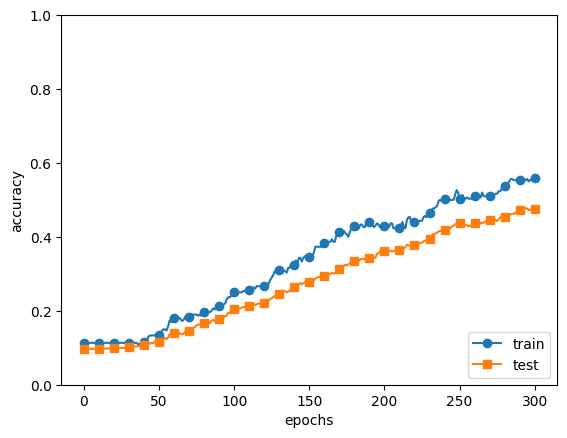

In [20]:
# coding: utf-8
import os
import sys
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net_extend import MultiLayerNetExtend
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 過学習を再現するために、学習データを削減
x_train = x_train[:300]
t_train = t_train[:300]

# Dropuoutの有無、割り合いの設定 ========================
use_dropout = True  # Dropoutなしのときの場合はFalseに
dropout_ratio = 0.2
# ====================================================

network = MultiLayerNetExtend(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                              output_size=10, use_dropout=use_dropout, dropout_ration=dropout_ratio)
trainer = Trainer(network, x_train, t_train, x_test, t_test,
                  epochs=301, mini_batch_size=100,
                  optimizer='sgd', optimizer_param={'lr': 0.01}, verbose=True)
trainer.train()

train_acc_list, test_acc_list = trainer.train_acc_list, trainer.test_acc_list

# グラフの描画==========
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, marker='o', label='train', markevery=10)
plt.plot(x, test_acc_list, marker='s', label='test', markevery=10)
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

Validation Dataset

In [21]:
from common.util import shuffle_dataset
from dataset.mnist import load_mnist
(x_train, t_train), (x_test, t_test) = load_mnist()
x_train, t_train = shuffle_dataset(x_train, t_train)

validation_rate = 0.20

validation_num = int(x_train.shape[0] * validation_rate)

x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]

하이퍼파라미터 최적화

In [22]:
weight_decay = 10 ** np.random.uniform(-8,-4)
lr = 10 ** np.random.uniform(-6,-2)

val acc:0.1 | lr:5.3707279922773414e-06, weight decay:2.5237082635760507e-06
val acc:0.83 | lr:0.009177882462041051, weight decay:2.3032465506492257e-07
val acc:0.07 | lr:1.4502996062963298e-06, weight decay:2.340552515986175e-06
val acc:0.27 | lr:0.001799037188596589, weight decay:3.9727573108310975e-06
val acc:0.12 | lr:8.104399779637802e-06, weight decay:1.2841117430389094e-08
val acc:0.84 | lr:0.009145542414771356, weight decay:2.6324809019779345e-06
val acc:0.12 | lr:1.9583186741787326e-05, weight decay:4.963188580480826e-08
val acc:0.1 | lr:0.00010776838843645012, weight decay:3.9557198498694536e-07
val acc:0.29 | lr:0.0017082298916798683, weight decay:1.936032219375438e-06
val acc:0.3 | lr:0.0009101291408448296, weight decay:4.1225262718690976e-08
val acc:0.31 | lr:0.0018217479851566163, weight decay:4.293691316536101e-08
val acc:0.02 | lr:3.734293046782398e-06, weight decay:4.921289180289865e-06
val acc:0.4 | lr:0.002189679780200649, weight decay:5.4005071603880406e-05
val acc:

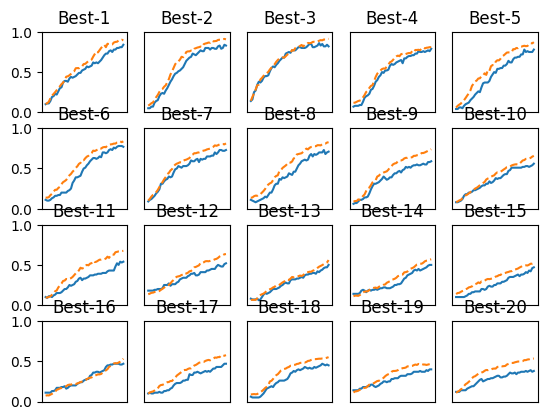

In [23]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.multi_layer_net import MultiLayerNet
from common.util import shuffle_dataset
from common.trainer import Trainer

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

# 高速化のため訓練データの削減
x_train = x_train[:500]
t_train = t_train[:500]

# 検証データの分離
validation_rate = 0.20
validation_num = int(x_train.shape[0] * validation_rate)
x_train, t_train = shuffle_dataset(x_train, t_train)
x_val = x_train[:validation_num]
t_val = t_train[:validation_num]
x_train = x_train[validation_num:]
t_train = t_train[validation_num:]


def __train(lr, weight_decay, epocs=50):
    network = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100, 100, 100],
                            output_size=10, weight_decay_lambda=weight_decay)
    trainer = Trainer(network, x_train, t_train, x_val, t_val,
                      epochs=epocs, mini_batch_size=100,
                      optimizer='sgd', optimizer_param={'lr': lr}, verbose=False)
    trainer.train()

    return trainer.test_acc_list, trainer.train_acc_list


# ハイパーパラメータのランダム探索======================================
optimization_trial = 100
results_val = {}
results_train = {}
for _ in range(optimization_trial):
    # 探索したハイパーパラメータの範囲を指定===============
    weight_decay = 10 ** np.random.uniform(-8, -4)
    lr = 10 ** np.random.uniform(-6, -2)
    # ================================================

    val_acc_list, train_acc_list = __train(lr, weight_decay)
    print("val acc:" + str(val_acc_list[-1]) + " | lr:" + str(lr) + ", weight decay:" + str(weight_decay))
    key = "lr:" + str(lr) + ", weight decay:" + str(weight_decay)
    results_val[key] = val_acc_list
    results_train[key] = train_acc_list

# グラフの描画========================================================
print("=========== Hyper-Parameter Optimization Result ===========")
graph_draw_num = 20
col_num = 5
row_num = int(np.ceil(graph_draw_num / col_num))
i = 0

for key, val_acc_list in sorted(results_val.items(), key=lambda x:x[1][-1], reverse=True):
    print("Best-" + str(i+1) + "(val acc:" + str(val_acc_list[-1]) + ") | " + key)

    plt.subplot(row_num, col_num, i+1)
    plt.title("Best-" + str(i+1))
    plt.ylim(0.0, 1.0)
    if i % 5: plt.yticks([])
    plt.xticks([])
    x = np.arange(len(val_acc_list))
    plt.plot(x, val_acc_list)
    plt.plot(x, results_train[key], "--")
    i += 1

    if i >= graph_draw_num:
        break

plt.show()
